In [319]:
include(joinpath("..","src","setup.jl"))
datadir = joinpath("..","data","count_lengths","run_2018-11-26")
using VegaLite
PlotAxes.set_backend!(:ggplot2)

:ggplot2

In [281]:
params = load_params(joinpath(datadir,"params.jld2"))
params.pindex = 1:size(params,1)
settings = joinpath("..","src","settings.toml")
settings = TOML.parsefile(settings)
settings["stimulus"]["repeats"] = 48

48

In [95]:
p = copy(params[select_params(params,f_c_a=5,f_c_m=5,Δf=6),:])
p.f_c_σ .= 0.2
p.s_c_a .= 5
p.s_c_m .= 5
p.s_c_σ .= 0.5
p.t_c_a .= 5
p.t_c_m .= 5
p.t_c_σ .= 0.5

1-element Array{Float64,1}:
 0.5

# Object model

In [303]:
p = copy(params[select_params(params,t_c_a=5,t_c_m=5,Δf=6),:])

1×36 DataFrame. Omitted printing of 29 columns
│ Row │ f_W_m_σ │ f_c_m   │ t_c_a   │ t_c_m   │ f         │ t_W_m_c │ t_c_x   │
│     │ Float64 │ Float64 │ Float64 │ Float64 │ Quantity… │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┼─────────┼───────────┼─────────┼─────────┤
│ 1   │ 5.6     │ 0.0     │ 5.0     │ 5.0     │ 500 Hz    │ 6.0     │ 3.0     │

In [304]:
p.t_c_a .= 15
p.t_c_m .= 5

1-element Array{Float64,1}:
 5.0

In [305]:
result = bistable_model(p,settings,intermediate_results=true);

┌ Info: 0.43% of frames (n = 1) failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/Documents/juliadev/AuditoryBistabilityLE/src/nmf.jl:47


In [306]:
function cleanparam(x)
    x = replace(x, r"\(3.0 s, ([0-9\.]+)" => s"β = \1")
    x = replace(x, r"(?<=, )([0-9\.]+)(?=\))" => pat -> "κ = $(Int(parse(Float64,pat)/10))s/Δt")
    x = replace(x, ")" => "")
end

cleanparam (generic function with 1 method)

In [307]:
df, = PlotAxes.asplotable(result.sources.outweights[10s .. 20s],quantize=(100,10));
first(df,6)
df.params .= cleanparam.(df.params);

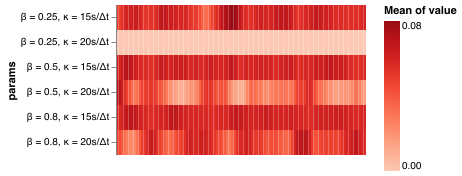

In [308]:
a = (df |> @vlplot(:rect, width=250, height=150,
      x={field=:time, typ="quantitative", bin={step=0.1}, axis=nothing}, #axis={values=[10,12.5,15,17.5,20]}},
      y={field=:params, typ="ordinal"},
      color={field=:value, aggregate="mean", typ="quantitative"},
      config={view={stroke="transparent"},
              scale={bandPaddingInner=0, bandPaddingOuter=0},
              range={heatmap={scheme="reds"}}}))

In [309]:
df,axes = PlotAxes.asplotable(result.primary_source[10s .. 20s],:time,:freq => logrange,quantize=(200,128))
first(df,6)

6×3 DataFrame
│ Row │ value      │ time    │ log_freq │
│     │ Float64    │ Float64 │ Float64  │
├─────┼────────────┼─────────┼──────────┤
│ 1   │ 7.41966e-6 │ 10.02   │ 6.02901  │
│ 2   │ 0.0149066  │ 10.08   │ 6.02901  │
│ 3   │ 0.0379978  │ 10.13   │ 6.02901  │
│ 4   │ 0.0022932  │ 10.18   │ 6.02901  │
│ 5   │ 0.0        │ 10.23   │ 6.02901  │
│ 6   │ 0.0        │ 10.28   │ 6.02901  │

In [272]:
df.freq = exp.(df.log_freq);

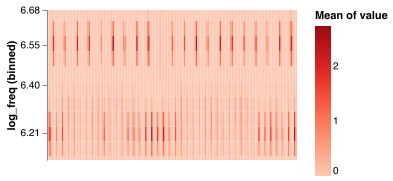

In [273]:
b = (df |> @vlplot(mark={:rect,clip=true}, width=250, height=150,
      x={field=:time, typ="quantitative", bin={step=axes[1].step}, axis=nothing}, #{values=[10,12.5,15,17.5,20]}},
      y={field=:log_freq, typ="quantitative", bin={step=axes[2].step}, 
      scale={domain=log.([450,800])}, axis={values=log.([500,600,700,800])}},
      color={field=:value, aggregate="mean", typ="quantitative"},
      config={view={stroke="transparent"},
              scale={bandPaddingInner=0, bandPaddingOuter=0},
              range={heatmap={scheme="reds"}}}))

In [310]:
len,val = result.percepts.counts

([1.5, 0.4, 0.4, 3.8, 3.1, 3.5, 0.4, 0.6, 0.8, 1.7, 6.1], Bool[false, true, false, true, false, true, false, true, false, true, false])

In [311]:
dfl = DataFrame(value=[val[1];val],time=[0;cumsum(len)]);
dfl[!,:lagtime] = lag(dfl.time,default=0);
c = (dfl |> @vlplot(mark={:rect,clip=true},width=250,height=15,
               x={field=:time,scale={domain=[10,20]}, axis={values=[10,12.5,15,17.5,20]}},
               x2=:lagtime,
               color={field=:value,typ="nominal",scale={scheme="set1"}}));

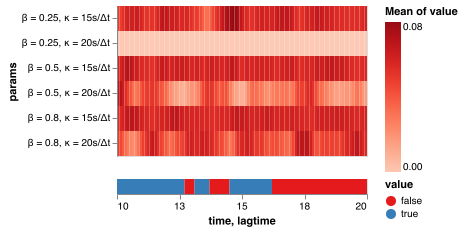

In [312]:
@vlplot(config={range={heatmap={scheme="reds"}},concat={spacing=5}}) + vcat(a,c)

# Central model

In [320]:
p = copy(params[select_params(params,s_c_a=5,s_c_m=5,Δf=6),:])

1×36 DataFrame. Omitted printing of 29 columns
│ Row │ f_W_m_σ │ f_c_m   │ t_c_a   │ t_c_m   │ f         │ t_W_m_c │ t_c_x   │
│     │ Float64 │ Float64 │ Float64 │ Float64 │ Quantity… │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┼─────────┼───────────┼─────────┼─────────┤
│ 1   │ 5.6     │ 0.0     │ 0.0     │ 0.0     │ 500 Hz    │ 6.0     │ 3.0     │

In [321]:
result = bistable_model(p,settings,intermediate_results=true);

┌ Info: 0.43% of frames (n = 1) failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/Documents/juliadev/AuditoryBistabilityLE/src/nmf.jl:47


In [322]:
df, = PlotAxes.asplotable(result.cortical.outweights[10s .. 20s],quantize=(100,10));
first(df,6)

6×3 DataFrame
│ Row │ value       │ time    │ scale   │
│     │ Float64     │ Float64 │ Float64 │
├─────┼─────────────┼─────────┼─────────┤
│ 1   │ -4.32683e-7 │ 10.05   │ 0.5     │
│ 2   │ 1.13629e-6  │ 10.16   │ 0.5     │
│ 3   │ 1.03514e-6  │ 10.26   │ 0.5     │
│ 4   │ 4.40464e-7  │ 10.36   │ 0.5     │
│ 5   │ -2.81479e-8 │ 10.46   │ 0.5     │
│ 6   │ -1.96117e-7 │ 10.56   │ 0.5     │

In [323]:
a = (df |> @vlplot(:rect, width=250, height=150,
      x={field=:time, typ="quantitative", bin={step=0.1}, axis=nothing}, #axis={values=[10,12.5,15,17.5,20]}},
      y={field=:scale, typ="ordinal"},
      color={field=:value, aggregate="mean", typ="quantitative"},
      config={view={stroke="transparent"},
              scale={bandPaddingInner=0, bandPaddingOuter=0},
              range={heatmap={scheme="reds"}}}));

In [294]:
df,axes = PlotAxes.asplotable(result.primary_source[10s .. 20s],:time,:freq => logrange,quantize=(200,128))
first(df,6)

6×3 DataFrame
│ Row │ value       │ time    │ log_freq │
│     │ Float64     │ Float64 │ Float64  │
├─────┼─────────────┼─────────┼──────────┤
│ 1   │ 4.74545e-6  │ 10.02   │ 6.02901  │
│ 2   │ 2.22104e-8  │ 10.08   │ 6.02901  │
│ 3   │ 0.00112357  │ 10.13   │ 6.02901  │
│ 4   │ 0.000454682 │ 10.18   │ 6.02901  │
│ 5   │ 0.0         │ 10.23   │ 6.02901  │
│ 6   │ 0.0         │ 10.28   │ 6.02901  │

In [297]:
len,val = result.percepts.counts

([0.8, 0.4, 2.0, 0.9, 2.5, 0.8, 1.8, 1.1, 2.3, 1.3, 1.3, 2.3, 3.9, 0.9], Bool[false, true, false, true, false, true, false, true, false, true, false, true, false, true])

In [298]:
dfl = DataFrame(value=[val[1];val],time=[0;cumsum(len)]);
dfl[!,:lagtime] = lag(dfl.time,default=0);
c = (dfl |> @vlplot(mark={:rect,clip=true},width=250,height=15,
               x={field=:time,scale={domain=[10,20]}, axis={values=[10,12.5,15,17.5,20]}},
               x2=:lagtime,
               color={field=:value,typ="nominal",scale={scheme="set1"}}));

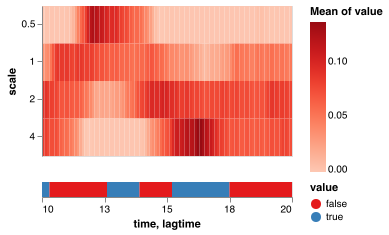

In [300]:
@vlplot(config={range={heatmap={scheme="reds"}},concat={spacing=5}}) + vcat(a,c)

# Peripheral model

In [332]:
p = copy(params[select_params(params,f_c_a=15,f_c_m=390,Δf=6),:])

1×36 DataFrame. Omitted printing of 29 columns
│ Row │ f_W_m_σ │ f_c_m   │ t_c_a   │ t_c_m   │ f         │ t_W_m_c │ t_c_x   │
│     │ Float64 │ Float64 │ Float64 │ Float64 │ Quantity… │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┼─────────┼───────────┼─────────┼─────────┤
│ 1   │ 5.6     │ 390.0   │ 0.0     │ 0.0     │ 500 Hz    │ 6.0     │ 3.0     │

In [350]:
p.f_c_m .= 200

1-element Array{Int64,1}:
 200

In [351]:
result = bistable_model(p,settings,intermediate_results=true);

In [353]:
df, = PlotAxes.asplotable(result.spect.result[10s .. 20s],:time,:freq => logrange, quantize=(200,128))
first(df,6)

6×3 DataFrame
│ Row │ value        │ time    │ log_freq │
│     │ Float64      │ Float64 │ Float64  │
├─────┼──────────────┼─────────┼──────────┤
│ 1   │ -3.10734e-25 │ 10.02   │ 4.52719  │
│ 2   │ -8.08068e-26 │ 10.08   │ 4.52719  │
│ 3   │ 5.22004e-26  │ 10.13   │ 4.52719  │
│ 4   │ 1.23378e-25  │ 10.18   │ 4.52719  │
│ 5   │ 1.48743e-25  │ 10.23   │ 4.52719  │
│ 6   │ 1.36963e-25  │ 10.28   │ 4.52719  │

In [358]:
a = (df |> @vlplot(mark={:rect,clip=true}, width=250, height=150,
      x={field=:time, typ="quantitative", bin={step=axes[1].step}, axis=nothing}, #{values=[10,12.5,15,17.5,20]}},
      y={field=:log_freq, typ="quantitative", bin={step=axes[2].step}, 
      scale={domain=log.([450,800])}, axis={values=log.([500,600,700,800])}},
      color={field=:value, aggregate="mean", typ="quantitative"},
      config={view={stroke="transparent"},
              scale={bandPaddingInner=0, bandPaddingOuter=0},
              range={heatmap={scheme="reds"}}}));

In [355]:
len,val = result.percepts.counts

([1.3, 1.0, 1.3, 0.7, 0.6, 1.2, 1.7, 1.7, 0.9, 0.6, 0.4, 1.4, 1.9, 3.0, 1.8, 1.9, 0.9], Bool[false, true, false, true, false, true, false, true, false, true, false, true, false, true, false, true, false])

In [356]:
dfl = DataFrame(value=[val[1];val],time=[0;cumsum(len)]);
dfl[!,:lagtime] = lag(dfl.time,default=0);
c = (dfl |> @vlplot(mark={:rect,clip=true},width=250,height=15,
               x={field=:time,scale={domain=[10,20]}, axis={values=[10,12.5,15,17.5,20]}},
               x2=:lagtime,
               color={field=:value,typ="nominal",scale={scheme="set1"}}));

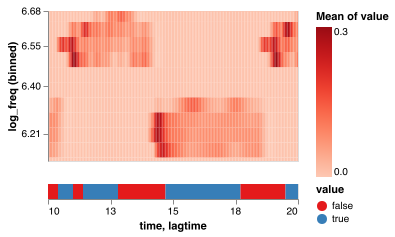

In [357]:
@vlplot(config={range={heatmap={scheme="reds"}},concat={spacing=5}}) + vcat(a,c)